# CSS 201 / 202 - CSS Bootcamp

## Week 06 - Lecture 02

### Umberto Mignozzetti

# Regression

# Regression

Recap Regression:

Theory:
- Minimizes mean squared error (or the residual sum of squares)
- Can have as many variables as we want (not really...)
- Good to answer about relationship (existence and strength)
- Synergy
- Not very flexible
- You need to check the consistency of your model (diagnostics: `model.get_influence()`)

Estimation:
- `statsmodels` do a good job. Tutorial [here](https://www.statsmodels.org/dev/examples/index.html).

In [1]:
## Loading Libraries and Modules

# scikit-learn: barebones, but fast and reliable
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.inspection import DecisionBoundaryDisplay
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# statsmodels: pretty and good to use, great for interpretable ML
from statsmodels.formula.api import ols, logit
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_partregress_grid, influence_plot

# Data processing
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Regression

Datasets:

- `duncan` dataset.
- `education` expenditure by US state dataset

In [2]:
## Loading the data
duncan = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/Duncan.csv')
duncan = duncan.set_index('profession')
educexp = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/educexp.csv')

## Multiple Linear Regression

- So far:
    + Is there a relationship between `prestige` and `income`? **Yes**
    + How strong is the relationship between `prestige` and `income`? **Yes**
    + Which variables are associated with `prestige`?
    + How can we accurately predict the prestige of professions not studied in this survey? **Yes, so far...**
    + Is the relationship linear? **Yes, so far...**
    + Is there a synergy among predictors?
    
- Can we do better? **Yes**, we have other predictors that we didn't not explore.

## Multiple Linear Regression

Let's fit the following model:

$$ \text{prestige} = \beta_0 + \beta_1\text{income} + \beta_2\text{education} + \varepsilon $$

In [3]:
## Running the actual regression:

# Create the model.Fit the model
model = ols('prestige ~ income', data = duncan).fit()
model3 = ols('prestige ~ income + education', data = duncan).fit()

# Print the parameters
print(model3.params)

Intercept   -6.064663
income       0.598733
education    0.545834
dtype: float64


Meaning:

$$ \text{prestige} \ \approx \ -6.06 + 0.60\text{income} + 0.55\text{education} $$

## Multiple Linear Regression

Partial regression plots:

eval_env: 1
eval_env: 1
eval_env: 1


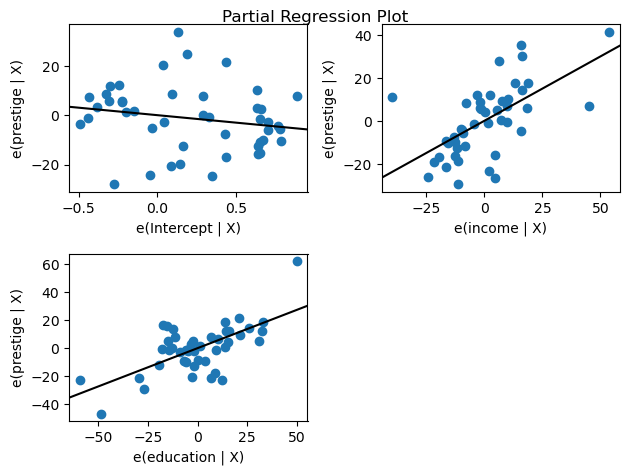

In [4]:
fig = plot_partregress_grid(model3)

## Multiple Linear Regression

Influence plot:

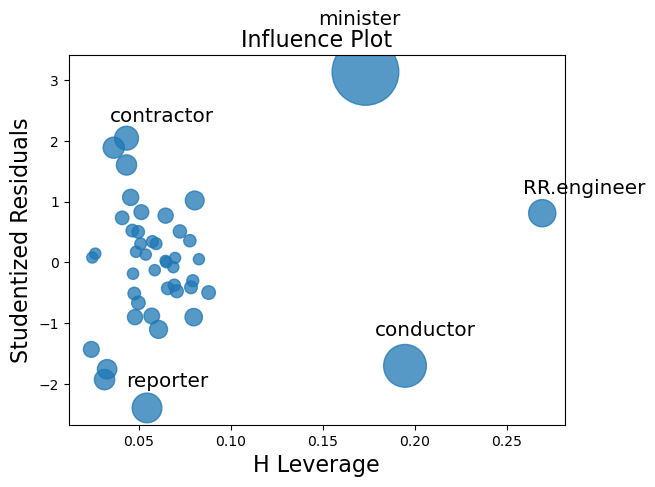

In [5]:
fig = influence_plot(model3)

## F-Statistic

Are we doing better than the linear regression? We can test that!

**Null hypothesis:** The model with fewer parameters is better.

**Alternative hypothesis:** At least one variable in the new model does well.

In [6]:
## Anova for model without x model with education
anova_lm(model, model3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,43.0,13022.800135,0.0,NaN,NaN,NaN
1,42.0,7506.698653,1.0,5516.101482,30.862603,0.000002


## RSE and R$^2$

We can also look at the Residual Standard Error and the R$^2$ to determine this:

In [7]:
# Model with only income
mse = model.mse_resid
print('The mean squared error: ' + str(mse))

# Residual Standard Error
rse = np.sqrt(mse)
print('The Residual Standard Error: ' + str(rse))

# R-squared
rsq = model.rsquared
print(rsq)

The mean squared error: 302.85581709700597
The Residual Standard Error: 17.402753147045612
0.701911139847978


## RSE and R$^2$

We can also look at the Residual Standard Error and the R$^2$ to determine this:

In [8]:
# Model with income and education
mse = model3.mse_resid
print('The mean squared error: ' + str(mse))

# Residual Standard Error
rse = np.sqrt(mse)
print('The Residual Standard Error: ' + str(rse))

# R-squared
rsq = model3.rsquared
print(rsq)

The mean squared error: 178.73092031177373
The Residual Standard Error: 13.369028398196098
0.8281734172543814


## Diagnostics

Besides the diagnostics that we run before, we can check something called *multicollinearity*

### Multicollinearity

- Multicollinearity is a situation when your predictors are highly correlated.

- In extreme cases, it messes up with the computations in your model.

![reg](https://github.com/umbertomig/POLI175public/blob/main/img/fig10.png?raw=true)

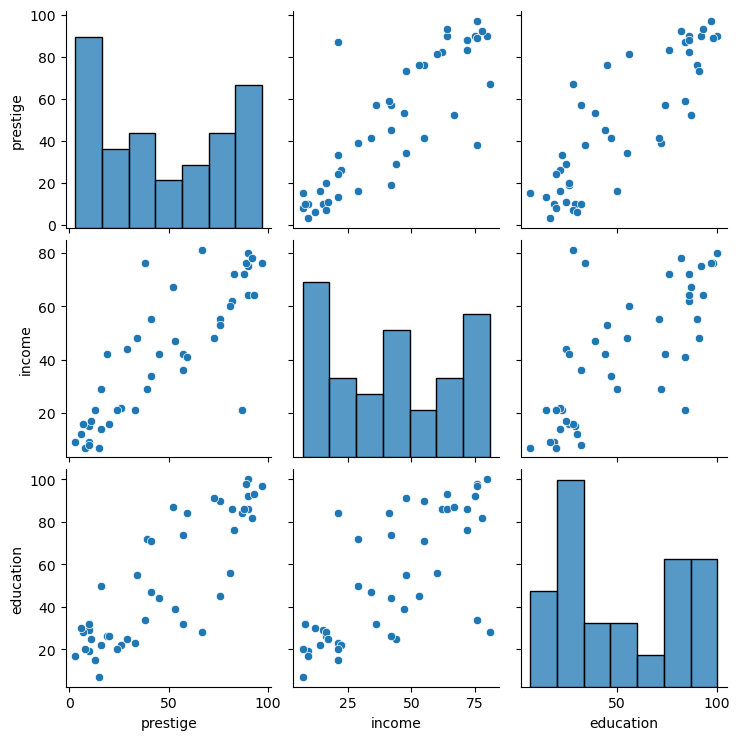

In [9]:
## Pairplot to check
sns.pairplot(duncan[['prestige', 'income', 'education']])
plt.show()

### Multicollinearity

- One measure of multicollinearity is the *Variance Inflation Factor*.
    + How much the multicollinearity is messing up with the estimates.
    
- To compute, it is fairly easy. As a rule-of-thumb, we would like to see values lower than 5.

- It is rarely a problem, though... Especially with large datasets.

In [10]:
## VIF
variables = duncan[['income', 'education']]
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[7.681386643382841, 7.681386643382841]

## Multiple Regression Models

**Check-in:** Run a multiple regression model for the education expenditure dataset.

In [11]:
## Your code here
educexp.head(2)

,education,income,young,urban,states
0,189,2824,350.7,508,ME
1,169,3259,345.9,564,NH


## Adding dummy variables to the mix

In [12]:
duncan.head(2)

,type,income,education,prestige
profession,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83


We should add `type` to the model. But how to do that, since it is a `character` variable?

We need to **create dummies**!

## Adding dummy variables to the mix

In [13]:
pd.get_dummies(duncan.type).sample(5)

,bc,prof,wc
profession,,,
soda.clerk,1,0,0
mail.carrier,0,0,1
physician,0,1,0
welfare.worker,0,1,0
professor,0,1,0


And we can add to the dataset:

In [14]:
dummies = pd.get_dummies(duncan.type, prefix = 'type', drop_first = True)
duncan = pd.concat([duncan, dummies], axis=1)

In [15]:
duncan.sample(3)

,type,income,education,prestige,type_prof,type_wc
profession,,,,,,
truck.driver,bc,21,15,13,0,0
store.clerk,wc,29,50,16,0,1
insurance.agent,wc,55,71,41,0,1


## Regression with dummies

**Check-in:** Add dummies to the mix and estimate the models.

In [16]:
## Your code here

## Diagnostics

**Check-in**: Do the diagnostics of the regression you just run.

In [17]:
# Your code here

## Application

- So far:
    + Is there a relationship between `prestige` and `income`? **Yes**
    + How strong is the relationship between `prestige` and `income`? **Yes**
    + Which variables are associated with `prestige`? **income, education, others?**
    + How can we accurately predict the prestige of professions not studied in this survey? **Yes**
    + Is the relationship linear? **It seems so**
    + Is there a synergy among predictors? **Good question!**

## Regression with interactions

Check for interactions!

In [18]:
model4 = ols('prestige ~ income * education', data = duncan).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     66.13
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           9.29e-16
Time:                        14:44:49   Log-Likelihood:                -178.91
No. Observations:                  45   AIC:                             365.8
Df Residuals:                      41   BIC:                             373.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -8.2509      7.379     -1.118      0.270     -23.152       6.650
income               0.6556      0.197      3.326      0.002       0.257       1.054
education            0.6060      0.192      3.150      0.003       0.218       0.995
income:education    -0.0012      0.003     -0.365      0.717      -0.008       0.006
==============================================================================
Omnibus:                        0.632   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.118
Skew:                           0.041   Prob(JB):                        0.943
Kurtosis:                       3.236   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Classification

## Classification

- Linear regression is great! But it assumes we want to predict a continuous target variable.

- But there are situations when our response variables is qualitative.

**Examples:**

- Whether a country default its debt obligations?

- Whether a person voted Republican, Democrat, Independent, voted for a different party, or did not turnout to vote?

- What determines the number of FOI requests that a given public office receives every day?

- Is a country expected to meet, exceed, or not meet the Paris Treaty Nationally Determined Contributions?

All these questions are qualitative in nature.

## Example

- In 1988, the Chilean Dictator Augusto Pinochet conducted a referendum to whether he should step out.

- The FLACSO in Chile conducted a surver on 2700 respondents.

- We are going to build a model to predict their voting intentions.

## Data

| **Variable** | **Meaning** |
|:---:|---|
| region | A factor with levels:<br>- `C`, Central; <br>- `M`, Metropolitan Santiago area; <br>- `N`, North; <br>- `S`, South; <br>- `SA`, city of Santiago. |
| population | The population size of respondent's community. |
| sex | A factor with levels: <br>- `F`, female; <br>- `M`, male. |
| age | The respondent's age in years. |
| education | A factor with levels: <br>- `P`, Primary; <br>- `S`, Secondary; <br>- `PS`, Post-secondary. |
| income | The respondent's monthly income, in Pesos. |
| statusquo | A scale of support for the status-quo. |
| vote | A factor with levels: <br>- `A`, will abstain; <br>- `N`, will vote no (against Pinochet);<br>- `U`, is undecided; <br>- `Y`, will vote yes (for Pinochet). |

In [19]:
## Loading the data
chile = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/chilesurvey.csv')
chile.head()
chile_clean = chile.dropna()
chile_clean = chile_clean[chile_clean['vote'].isin(['Y', 'N'])]
chile_clean['vote'] = np.where(chile_clean['vote'] == 'Y', 1, 0)
chile_clean['logincome'] = np.log(chile_clean['income'])
chile_clean['logpop'] = np.log(chile_clean['population'])
chile_clean.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541


## Why not run a Linear Regression?

You could ask this very valid question. And my answer here differs a bit from the book.

**My suggestion:**

- If you want to **measure a treatment effect**, or any other fitting where **explanation trumps prediction**, go with the linear regression.
    + Easy to explain to a lay audience.
    + Good polynomial expansion around the ATE.
    + Needs a careful design (in Causal Inference, the design is more important than the statistical method!).
    + Interaction terms are just partial derivatives of the fitted equation.

## Why not run a Linear Regression?

You could ask this very valid question. And my answer here differs a bit from the book.

**My suggestion:**

- If you want to **predict outcomes**, go with a classification model appropriate for your target variable unit.
    + You are not going to do `weird` prediction.
    + You have a marginal efficiency gain (in terms of Standard Errors).
    + If you have an ordered target variable, your model does look like more meaningful.
    + Need to be careful about interaction terms (has to do with taking derivatives of link function in Generalized Linear Models).

## Why not run a Linear Regression?

You could ask this very valid question. And my answer here differs a bit from the book.

**My suggestion:**

- Be **careful when you have discrete nominal variation in your target variable**:
    + Binary outcome: Linear Regression and Linear Discriminant Analysis are the same.
    + Three or more categories, like the `vote` in the Chilean dataset messes up badly with things.

## Book's Example

Chance of Default on Credit Card Debt by Account Balance:

![linear x logistic regression IRLR book](https://github.com/umbertomig/POLI175public/blob/main/img/linvslogit.png?raw=true)

## Logistic Regression

Logistic Regression belongs to a class of models called [Generalized Linear Models](https://en.wikipedia.org/wiki/Generalized_linear_model) (or GLM for short).

- A GLM, in a nutshell (and in a proudly lazy definition) is an expansion of Linear Model that assumes:
    + A Linear Relationship in part of the model
    + But then applies a non-linear transformation to the response variable.

- The non-linear transformation is called `link function`. Many link functions around (check [here](https://en.wikipedia.org/wiki/Generalized_linear_model) for various link functions).

- The link function is going to determine which types of models we run.

- When the outcome variable is binary, we may use the `Logistic` or `Probit` links.

## Logistic Regression

In a regression, we are investigating something along the lines of:

$$ \mathbb{E}[Y | X] \ = \ \beta_0 + \beta_1 X $$

But when the outcome is binary we would like to get:

$$ \mathbb{E}[Y | X] \ = \ \mathbb{P}(Y = 1 | X) $$

And the Logistic link is nothing but:

$$ \mathbb{P}(Y = 1 | X) \ = \ \dfrac{e^{(\beta_0 + \beta_1X)}}{1 + e^{(\beta_0 + \beta_1X)}} $$

## Logistic Regression

With a bit of manipulation, we get to something called odds ratio:

$$ \dfrac{\mathbb{P}(Y = 1 | X)}{\mathbb{P}(Y = 0 | X)} \ = \ \dfrac{\mathbb{P}(Y = 1 | X)}{1 - \mathbb{P}(Y = 1 | X)} \ = \ e^{(\beta_0 + \beta_1X)} $$

And logging the thing gets rid of the Euler constant:

$$ \log \left( \dfrac{\mathbb{P}(Y = 1 | X)}{1 - \mathbb{P}(Y = 1 | X)}\right) \ = \ \beta_0 + \beta_1X $$

And this is the Logit Link.

## Logistic Regression

Little detour to talk about odd ratios:

- Note the odd ratio: $\dfrac{\mathbb{P}(Y = 1 | X)}{1 - \mathbb{P}(Y = 1 | X)}$

- It is a ratio between the chance of $Y = 1$ divided by the chance of $Y = 0$.

- Since probabilities are between zero and one, the ratio is always between $(0, \infty)$.

Example:

- If based on characteristics, two in every ten people vote for Pinochet, $\mathbb{P}(Y = 1 | X = \text{some characs.}) = 0.2$ and the odds ratio is $1/4$.

- If based on other set of characteristics, nine out of ten people vote for Pinochet, $\mathbb{P}(Y = 1 | X = \text{some other characs.}) = 0.9$ and the odds ratio is $9$.

- One is like the number that does not change the ratios.


## Logistic Regression

Little other detour to talk about the coefficients:

- In linear regression, changes in one unit of $x_i$ changes your target variable in $\beta_i$ units, on average.

- In logistic regression, changes in one unit of $x_i$ changes **the log odds** your target variable in $\beta_i$ units, on average.

- Multiplies the odds by $e^{\beta_i}$! This is **not** a straight line!

- Easy proxy (does not work for interaction terms): 
    + When $\beta_1$ is **positive**, it **increases** the $\mathbb{P}(Y = 1 | X)$
    + When $\beta_1$ is **negative**, it **decreases** the $\mathbb{P}(Y = 1 | X)$
    
- Try to compute the partial derivatives on $X$ and you will see the complications!

## Logistic Regression

Technical:

1. The estimation is through [maximizing the likelihood function](https://en.wikipedia.org/wiki/Likelihood_function).
    + This is outside the scope of the course, but an interesting topic to learn in an advanced course.


2. The hypothesis test for the coefficient's significance in here is a Z-test (based on the Normal distribution).
    + Null Hypothesis: $H_0: \ \beta_i = 0$ or alternatively $H_0: \ e^{\beta_i} = 1$.


3. Making predictions:
    + Just insert the predicted $\hat{\beta}$s on the equation.
    
$$ \hat{p}(X) \ = \ \dfrac{e^{\hat{\beta}_0 + \hat{\beta}_1 X}}{1 + e^{\hat{\beta}_0 + \hat{\beta}_1 X}} $$

## Logistic Regression

First, let's fit a Linear Regression:

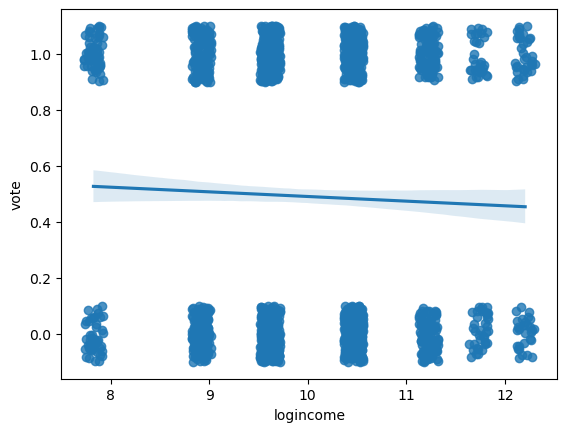

In [20]:
sns.regplot(x = 'logincome', y = 'vote', x_jitter = 0.1, y_jitter = 0.1, data = chile_clean)
plt.show()

## Logistic Regression

In [21]:
# Linear Model
modlin = ols('vote ~ logincome', data = chile_clean).fit()
modlin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   vote   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.994
Date:                Tue, 08 Aug 2023   Prob (F-statistic):              0.158
Time:                        14:44:49   Log-Likelihood:                -1234.7
No. Observations:                1703   AIC:                             2473.
Df Residuals:                    1701   BIC:                             2484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6568      0.118      5.560      0.000       0.425       0.889
logincome     -0.0166      0.012     -1.412      0.158      -0.040       0.006
==============================================================================
Omnibus:                     6175.448   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.505
Skew:                           0.037   Prob(JB):                     4.52e-62
Kurtosis:                       1.006   Cond. No.                         99.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression

Now, let us fit a Logistic Regression:

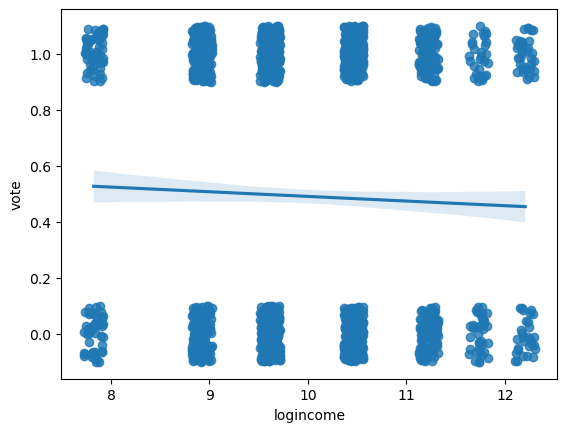

In [22]:
## Seaborn plot
sns.regplot(x = 'logincome', y = 'vote', 
            x_jitter = 0.1, y_jitter = 0.1, 
            data = chile_clean, logistic = True)
plt.show()

## Logistic Regression

In [23]:
# Logistic Regression
modlogit = logit('vote ~ logincome', data = chile_clean).fit()
modlogit.summary()

Optimization terminated successfully.
         Current function value: 0.692396
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                          Logit   Df Residuals:                     1701
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:               0.0008452
Time:                        14:44:50   Log-Likelihood:                -1179.2
converged:                       True   LL-Null:                       -1180.1
Covariance Type:            nonrobust   LLR p-value:                    0.1578
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6282      0.473      1.327      0.185      -0.300       1.556
logincome     -0.0665      0.047     -1.411      0.158      -0.159       0.026
==============================================================================
"""

## Logistic Regression

In [24]:
# Logistic Regression
modlogit2 = logit('vote ~ logincome + logpop + region + age + education', data = chile_clean).fit()
modlogit2.summary()

Optimization terminated successfully.
         Current function value: 0.647295
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                          Logit   Df Residuals:                     1693
Method:                           MLE   Df Model:                            9
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                 0.06593
Time:                        14:44:50   Log-Likelihood:                -1102.3
converged:                       True   LL-Null:                       -1180.1
Covariance Type:            nonrobust   LLR p-value:                 6.060e-29
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4750      0.798      0.595      0.552      -1.089       2.039
region[T.M]         0.8302      0.321      2.586      0.010       0.201       1.459
region[T.N]         0.6427      0.178      3.620      0.000       0.295       0.991
region[T.S]         0.4885      0.146      3.349      0.001       0.203       0.774
region[T.SA]        0.3007      0.160      1.879      0.060      -0.013       0.614
education[T.PS]    -1.0723      0.172     -6.249      0.000      -1.409      -0.736
education[T.S]     -0.6103      0.128     -4.753      0.000      -0.862      -0.359
logincome           0.2482      0.060      4.113      0.000       0.130       0.366
logpop             -0.2964      0.059     -5.057      0.000      -0.411      -0.182
age                 0.0137      0.004      3.743      0.000       0.007       0.021
===================================================================================
"""

## Logistic Regression

- Let's look at the parameters:

In [25]:
## Parameters
np.exp(modlogit2.params)

Intercept          1.607991
region[T.M]        2.293693
region[T.N]        1.901602
region[T.S]        1.629846
region[T.SA]       1.350806
education[T.PS]    0.342228
education[T.S]     0.543187
logincome          1.281721
logpop             0.743506
age                1.013824
dtype: float64

## Logistic Regression

- Let's look at the parameters:

In [26]:
## Parameters
np.exp(modlogit2.params)-1

Intercept          0.607991
region[T.M]        1.293693
region[T.N]        0.901602
region[T.S]        0.629846
region[T.SA]       0.350806
education[T.PS]   -0.657772
education[T.S]    -0.456813
logincome          0.281721
logpop            -0.256494
age                0.013824
dtype: float64

## Logistic Regression

- Now with Scikit Learn:

In [27]:
# Target variable
y = chile_clean['vote']

# Predictors
X = chile_clean[['logincome', 'logpop', 'age']]

# Loading the model
logreg =  LogisticRegression() 

# Fitting the model
logreg.fit(X, y)

# Getting parameters
print(logreg.intercept_, logreg.coef_)

[2.63089802] [[ 0.0453639  -0.3392518   0.02031414]]


## Logistic Regression

Where are the categorical variables?

In Scikit Learn, you need to create dummy variables for the categorical vars. 

Thus, you should do:

In [28]:
## Detour: Creating Dummies for Male
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean, dummies], axis=1)
chile_clean_wdumvars.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0


## Logistic Regression

**Your turn:** Create dummies for `region` and `education`. Which category was dropped in each of the processes?

In [29]:
## Your code here

## Creating dummies

In [30]:
## Dummies

# Sex
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean, dummies], axis=1)

# Education
dummies = pd.get_dummies(chile_clean['region'], prefix = 'region', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean_wdumvars, dummies], axis=1)

# Region
dummies = pd.get_dummies(chile_clean['education'], prefix = 'education', drop_first = True)
chile_clean_wdumvars = pd.concat([chile_clean_wdumvars, dummies], axis=1)

## Head
chile_clean_wdumvars.head()

# You can even drop the original variables, if you want to: 
# DataFrame.drop(labels = ['v1, 'v2',..., 'vn'], axis = 1)

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0,0,1,0,0,0,1


## Logistic Regression

- Now with Scikit Learn, and using all the categorical variables:

In [31]:
# Target variable
y = chile_clean_wdumvars['vote']

# Predictors
X = chile_clean_wdumvars[['logincome', 'logpop', 'age', 
                          'sex_M', 
                          'region_M', 'region_N', 'region_S', 'region_SA', 
                          'education_PS', 'education_S']]

# Loading the model
logreg =  LogisticRegression(solver = 'newton-cg') 

# Fitting the model
logreg.fit(X, y)

LogisticRegression(solver='newton-cg')

## Logistic Regression

In [32]:
# Getting parameters
print('Original coefficients: ')
print(logreg.intercept_, logreg.coef_)

print('\n\n')

# Exps:
print('Exponentiated coefficients: ')
print(np.exp(logreg.intercept_), np.exp(logreg.coef_))

Original coefficients: 
[0.86307463] [[ 0.26476284 -0.322841    0.01517345 -0.60709657  0.70687911  0.57056382
   0.46210142  0.28097537 -0.99151494 -0.55811258]]



Exponentiated coefficients: 
[2.37043771] [[1.3031219  0.72408898 1.01528916 0.54493074 2.02765328 1.76926432
  1.58740629 1.32442098 0.3710142  0.57228819]]


# Generative Models of Classification

## Generative Models of Classification

Logistic regression involves modeling the probability of a response given a set of parameters
    + Uses the logistic link for the *conditional distribution*
    
$$ \mathbb{E}(Y = 1 | X = x) \ = \ \mathbb{P}(Y = 1 | X = x) \ = \ \text{Logit}(\beta_0 + \cdots + \beta_pX_p) $$

Another approach is to model the distribution for each values of $Y$.

And then, use the Bayes' Theorem to get the conditional distributions.

But why?

1. Separation

2. Small sample size

## Generative Models of Classification

Let $\pi_k$ the prior probability of $Y = k$.

And let $f_k(x) = \mathbb{P}(X = x | Y = k)$ the density function for an observation that comes from the $k$-th class.

The Bayes theorem says that:

$$ \mathbb{P}(Y = k | X = x) \ = \ \dfrac{\pi_kf_k(x)}{\sum_l \pi_l f_l(x)} $$

Now, estimating $\pi_k$ is easy: we just compute the fraction that belongs to the $k$-th class.

How about $f$?

+ Different estimators are going to give us different classifiers!

## Generative Models of Classification

### 1. Linear Discriminant Analysis

- Suppose we have only one variable $x$ and $f_k$ is Gaussian:

$$ x \sim N(\mu_k, \sigma_k^2) $$

- And assuming further that the draws have the same variance: $\sigma^2 = \sigma_k^2 \forall k$

- Computing the log of the posterior gives us:

$$ \delta_k(x) \ = \ x \dfrac{\mu_k}{\sigma^2} - \dfrac{\mu_k^2}{2\sigma^2} + \log(\pi_k) $$

## Generative Models of Classification

### 1. Linear Discriminant Analysis

And the decision for which class the $x$ belongs is simple: **Whichever has the highest probability is the "winner"**.

1. Let $x$

2. Compute $\delta_0(x)$

3. Compute $\delta_1(x)$

4. The highest is the winner :-)

## Generative Models of Classification

### 1. Linear Discriminant Analysis

But how the decision boundary looks like? We need to find the *indifference point*:

$$ \delta_1(x) = \delta_0(x) $$

Do the algebra, and you are going to find:

$$ x \ = \ \dfrac{\mu_0 + \mu_1}{2} $$



## Generative Models of Classification

### 1. Linear Discriminant Analysis

![img lda](https://github.com/umbertomig/POLI175public/blob/main/img/ldabounds.png?raw=true)

## Generative Models of Classification

### 1. Linear Discriminant Analysis

And the LDA approximate the quantities of interest by doing the following:

1. $$ \widehat{\mu}_k  \ = \ \dfrac{1}{n_k} \sum_{i:y_i = k}x_i $$


2. $$ \widehat{\sigma}^2 \ = \ \dfrac{1}{n - K} \sum_{k=1}^K\sum_{i:y_i = k}(x_i - \widehat{\mu}_k)^2 $$


3. $$ \widehat{\pi}_k \ = \ \dfrac{n_k}{n} $$

Note that you can classify more than two categories.

## Generative Models of Classification

### 1. Linear Discriminant Analysis

The chance that $x$ belongs to $y=k$ is going to be:

$$ \widehat{\delta}_k(x) \ = \ x \dfrac{\widehat{\mu}_k}{\widehat{\sigma}^2} - \dfrac{\widehat{\mu}_k^2}{2\widehat{\sigma}^2} + \log(\widehat{\pi}_k) $$

Note that this is a linear function, so the name `Linear Discriminant Analysis`!

## Generative Models of Classification

### 1. Linear Discriminant Analysis

Now let's fit it using `scikit learn`

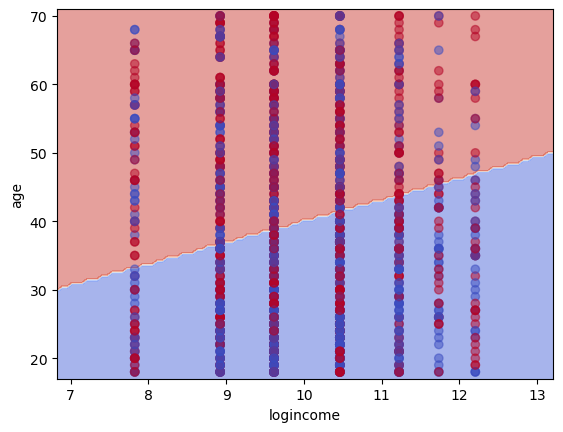

In [33]:
# Start a LDA (do not mix this up with Latent Dirichlet Allocation!)
X, y = chile_clean[['logincome', 'age']], chile_clean['vote']

# Create the model
ldan = LinearDiscriminantAnalysis()

# Fitting model
ldan.fit(X, y)

# Plotting the tree boundaries
fig = DecisionBoundaryDisplay.from_estimator(ldan, X, response_method="predict",
                                             alpha=0.5, cmap=plt.cm.coolwarm)

# Plotting the data points    
fig.ax_.scatter(x = chile_clean['logincome'], y = chile_clean['age'], 
                c = y, alpha = 0.5,
                cmap = plt.cm.coolwarm)

plt.show()

## Generative Models of Classification

### 1. Linear Discriminant Analysis

The most fundamental question:

- How much error in classification we are doing?

- To learn that, we need to study the `confusion matrix`!

### Measuring Performance

**Confusion Matrix**:

|  | **Predicted: 0** | **Predicted: 1** |
|---|---|---|
| **Actual: 0** | True Negative | False Positive |
| **Actual: 1** | False Negative | True Positive |

1. **Accuracy:** $$\dfrac{\text{correct predictions}}{\text{total observations}} \ = \ \dfrac{tp + tn}{tp + tn + fp + fn}$$

- High accuracy: lots of correct predictions!

### Measuring Performance

**Confusion Matrix**:

|  | **Predicted: 0** | **Predicted: 1** |
|---|---|---|
| **Actual: 0** | True Negative | False Positive |
| **Actual: 1** | False Negative | True Positive |

2. **Precision:** $$\dfrac{\text{true positives}}{\text{total predicted positive}} \ = \ \dfrac{tp}{tp + fp}$$

- High precision: low false-positive rates.


### Measuring Performance

**Confusion Matrix**:

|  | **Predicted: 0** | **Predicted: 1** |
|---|---|---|
| **Actual: 0** | True Negative | False Positive |
| **Actual: 1** | False Negative | True Positive |

3. **Recall:** $$\dfrac{\text{true positives}}{\text{total actual positive}} \ = \ \dfrac{tp}{tp + fn}$$

- High recall: low false-negative rates.


### Measuring Performance

4. **F1-Score**:

$$ \text{F1} \ = \ 2 \times \dfrac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$

- Lets look at the two models: logistic x lda:

In [ ]:
# Target variable
y = chile_clean_wdumvars['vote']

# Predictors
X = chile_clean_wdumvars[['logincome', 'logpop', 'age', 
                          'sex_M', 
                          'region_M', 'region_N', 'region_S', 'region_SA', 
                          'education_PS', 'education_S']]

# Loading the model
logreg =  LogisticRegression(solver = 'newton-cg')
ldan = LinearDiscriminantAnalysis()

# Fitting the models
logreg.fit(X, y)
ldan.fit(X, y)

### Measuring Performance

- Lets look at the two models: logistic x lda:

In [ ]:
# Predictions
y_pred_logreg = logreg.predict(X)
y_pred_ldan = ldan.predict(X)

# Logistic Regression
print(confusion_matrix(y, y_pred_logreg))

# Linear Discriminant Analysis
print(confusion_matrix(y, y_pred_ldan))

In [ ]:
# Logistic Classification Report
print(classification_report(y, y_pred_logreg))

In [ ]:
# LDA Classification Report
print(classification_report(y, y_pred_ldan))

## Generative Models of Classification

### 2. Quadratic Discriminant Analysis

The main difference is that it assumes that every observation has its own covariance matrix:

- Drop the `same-sigma-assumption`.

### 3. Naïve Bayes

Instead of assuming that $f$ belongs to a class of distributions (e.g., Normal), it assumes that the $f$s are independent:

- Drop the `Multivariate-Normal-assumption`.

- For $p$ predictors, you make only assumptions about each $x_{ik}$:

$$ f_k(x) \ = \ f_{k1}(x_1)\times \cdots \times f_{kp}(x_p) $$

- And you assume a normal distribution (Gaussian shape) for each variable...

## Generative Models of Classification


![img](https://github.com/umbertomig/POLI175public/blob/main/img/ldaxqdaxnb.png?raw=true)

- Purple: Naïve Bayes; Black: LDA; Green: QDA.

In [ ]:
## QDA
qdan = QuadraticDiscriminantAnalysis()
qdan.fit(X, y)

## Gaussian Naive Bayes
nbays = GaussianNB()
nbays.fit(X, y)


# Predictions
y_pred_logreg = logreg.predict(X)
y_pred_ldan = ldan.predict(X)
y_pred_qdab = qdan.predict(X)
y_pred_nbays = nbays.predict(X)

## Generative Models of Classification

In [ ]:
# Logistic Regression
print(classification_report(y, y_pred_logreg))

## Generative Models of Classification

In [ ]:
# Linear Discriminant Analysis
print(classification_report(y, y_pred_ldan))

## Generative Models of Classification

In [ ]:
# Quadratic Discriminant Analysis
print(classification_report(y, y_pred_qdab))

## Generative Models of Classification

In [ ]:
# Gaussian Naive Bayes
print(classification_report(y, y_pred_nbays))

## Logistic x Generative Models for Classification

**Check-in**: Does social pressure affects turnout?

Gerber, Green, and Larimer. 2008 studied this question on their ["*Social Pressure and Voter Turnout: Evidence from a Large-Scale Field Experiment.*" **American Political Science Review**, 102 (1): 33-48.](http://www.donaldgreen.com/wp-content/uploads/2015/09/Gerber_Green_Larimer-APSR-2008.pdf).

They selected households in Michigan receive a letter containing the following information:

> Dear Registered Voter: \concept{WHAT IF YOUR NEIGHBORS KNEW WHETHER YOU VOTED?} ... We’re sending this mailing to you and your neighbors to publicize who does and does not vote. The chart shows the names of some of your neighbors, showing which have voted in the past. After the August 8 election, we intend to mail an updated chart. You and your neighbors will all know who voted and who did not. \concept{DO YOUR CIVIC DUTY--VOTE!}

| MAPLE DR                 | Aug 2004    | Nov 2004 | Aug 2006 |
|--------------------------|-------------|----------|----------|
| 9995 JOSEPH JAMES SMITH  | Voted       | Voted    | ???      |
| 995 JENNIFER KAY SMITH   | Didn't vote | Voted    | ???      |
| 9997 RICHARD B JACKSON   | Didn't vote | Voted    | ???      |
| 9999 KATHY MARIE JACKSON | Didn't vote | Voted    | ???      |

The treatment assignment is called `pressure`. If no pressure, then the voter received no letter. We want to study whether `pressure` affected `voted`. 

Fit all models we learned so far on this dataset (Note: The linear is the most adequate, since the data comes from a randomized experiment, but please fit all).

In [ ]:
voting = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI30Dpublic/main/datasets/voting.csv')

# Your answers here

# Questions?

# See you in the next class!